<a href="https://colab.research.google.com/github/drawcodeboy/first_ML_DL/blob/main/firstMLDL_09_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RNN(Recurrent Neural Network), 순환 신경망

>* IMDB 데이터 셋의 구성 (숫자로 이루어짐, 왜 숫자인가?)
>* Padding이나 Truncating이 앞에서 진행되는 이유
>* RNN에서 One-hot encoding을 사용하는 이유: 숫자의 크기 속성을 없애기 위해 one-hot encoding을 사용함으로써 activation function을 거쳐도 수의 크기가 아무런 영향을 끼치지 않게 하는 것이다.
>* One-hot encoding의 단점: 입력 데이터의 크기가 너무 커진다.
>* Word Embedding: 숫자마다 고유 실수 벡터를 부여함으로써 입력의 크기 부담을 줄인다.

In [ ]:
from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)

"""
가장 자주 사용하는 단어를 500개만 가져오기 위해 데이터를 가져올 때,
num_words를 통해 지정
"""

17473536/17464789 [==============================] - 0s 0us/step


'\n가장 자주 사용하는 단어를 500개만 가져오기 위해 데이터를 가져올 때,\nnum_words를 통해 지정\n'

In [ ]:
print(train_input.shape, train_target.shape)

"""
shape가 1차원적으로 25000개가 들어가있다.
이 뜻은 25000개의 샘플이 들어가있는데 각 샘플마다 숫자들로 존재하고,
그 숫자들이 속한 각 샘플들은 모두 25000개의 리스트로 들어갔기에 이런 1차원의 shape를 띄는 것이다.
즉, 이 데이터는 개별 리뷰를 담은 파이썬 리스트 객체로 이루어진 넘파이 배열이다.
"""

(25000,) (25000,)


'\nshape가 1차원적으로 25000개가 들어가있다.\n이 뜻은 25000개의 샘플이 들어가있는데 각 샘플마다 숫자들로 존재하고,\n그 숫자들이 속한 각 샘플들은 모두 25000개의 리스트로 들어갔기에 이런 1차원의 shape를 띄는 것이다.\n즉, 이 데이터는 개별 리뷰를 담은 파이썬 리스트 객체로 이루어진 넘파이 배열이다.\n'

In [ ]:
print(len(train_input[0]))
"""
첫번째 샘플의 길이를 확인함으로써 각 샘플은 리스트 객체로 이루어졌다는 것을 확인
"""

218


'\n첫번째 샘플의 길이를 확인함으로써 각 샘플은 리스트 객체로 이루어졌다는 것을 확인\n'

In [ ]:
print(train_input[0])
"""
어휘 사전에 없는 단어는 2로 표시, 0은 Padding을 의미
현재 출력은 어떠한 처리를 하지 않았으므로 0은 있을 수 없다.
"""

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


'\n어휘 사전에 없는 단어는 2로 표시, 0은 Padding을 의미\n현재 출력은 어떠한 처리를 하지 않았으므로 0은 있을 수 없다.\n'

In [ ]:
# train, val set 분리
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42
)

In [ ]:
# 각 리뷰의 길이를 계산해서 리스트에 담아 시각화 해보기
import numpy as np
lengths = np.array([len(x) for x in train_input])

In [ ]:
# 평균과 중간값 확인을 통해 샘플의 길이가 작은 쪽으로 치우쳐있는 것을 확인
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


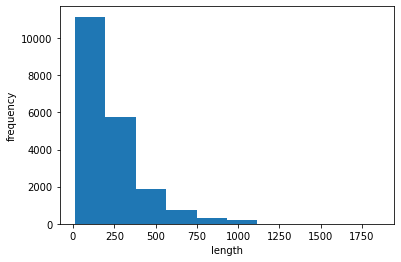

In [ ]:
# 시각화를 통해 확인
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [ ]:
# 모든 단어의 크기를 통일
# 100으로 동일하게 Padding
# 케라스는 Sequence Data를 처리하는 함수 pad_sequences()를 제공한다.
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)

In [ ]:
# 비교
# train_input은 파이썬 리스트의 객체를 원소로 가지는 배열이었지만
# train_seq는 2차원 배열이 되었다.
print(train_input.shape, train_seq.shape)

(20000,) (20000, 100)


In [ ]:
print(train_seq[0])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [ ]:
# padding을 하기 전에 데이터를 확인함으로써 padding한 데이터가
# 앞에서 잘렸는지 뒤에서 잘렸는지 알아낼 수 있음
# >> 앞에서 잘림.

# 음수 인덱스와 슬라이싱 연산자로 확인 가능
# -x : 뒤에서 x칸만큼 앞 index를 나타냄.
print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


In [ ]:
# Padding 또한 앞에서 0이 추가된다.
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [ ]:
# 순환 신경망 만들기

from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape=(100,500)))
# RNN의 기본 activation은 tanh를 사용
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
# train_seq를 one-hot encoding을 시키기 위해 케라스 유틸리티 패키지를 사용

train_oh = keras.utils.to_categorical(train_seq)

In [ ]:
print(train_oh.shape)

"""
(20000, 100, 500)
(Sample의 개수, Sample 하나의 길이, Sample 하나의 단어 -> one-hot encoding 배열)

이러한 이유에서 SimpleRNN의 input_shape를 (100, 500)으로 구성
"""

(20000, 100, 500)


'\n(20000, 100, 500)\n(Sample의 개수, Sample 하나의 길이, Sample 하나의 단어 -> one-hot encoding 배열)\n\n이러한 이유에서 SimpleRNN의 input_shape를 (100, 500)으로 구성\n'

In [ ]:
# one_hot encoding이 되었는지 출력을 통해 확인 (1)

print(train_oh[0][0][:12])
print(np.sum(train_oh[0][0]))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
1.0


In [ ]:
# val_set도 마찬가지로 one-hot encoding

val_seq = pad_sequences(val_input, maxlen=100)
val_oh = keras.utils.to_categorical(val_seq)

In [ ]:
# 모델 구조 출력

model.summary()

"""
순환층 Param: 4072
1) 입력 -> 순환층: 500 x 8 = 4000
2) 순환층, Hidden State 순환: 8 x 8 = 64
3) 순환층의 intercept: 8
총 Param: 4000 + 64 + 8 = 4072 

분류층(?) Param: 9

1) 입력 -> Dense 층: 8 x 1 = 8
2) Dense 층 intercept: 1
총 Param: 8 + 1 = 9
"""

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


'\n순환층 Param: 4072\n1) 입력 -> 순환층: 500 x 8 = 4000\n2) 순환층, Hidden State 순환: 8 x 8 = 64\n3) 순환층의 intercept: 8\n총 Param: 4000 + 64 + 8 = 4072 \n\n분류층(?) Param: 9\n\n1) 입력 -> Dense 층: 8 x 1 = 8\n2) Dense 층 intercept: 1\n총 Param: 8 + 1 = 9\n'

In [ ]:
# 순환 신경망 훈련 (using one-hot encoding)
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(train_oh, train_target, epochs=100, batch_size=4,
                    validation_data=(val_oh, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
5000/5000 [==============================] - 253s 50ms/step - loss: 0.6932 - accuracy: 0.5186 - val_loss: 0.6801 - val_accuracy: 0.5924
Epoch 2/100
5000/5000 [==============================] - 242s 48ms/step - loss: 0.6543 - accuracy: 0.6382 - val_loss: 0.6266 - val_accuracy: 0.6824
Epoch 3/100
5000/5000 [==============================] - 241s 48ms/step - loss: 0.5935 - accuracy: 0.7103 - val_loss: 0.5688 - val_accuracy: 0.7164
Epoch 4/100
5000/5000 [==============================] - 240s 48ms/step - loss: 0.5429 - accuracy: 0.7445 - val_loss: 0.5299 - val_accuracy: 0.7526
Epoch 5/100
5000/5000 [==============================] - 240s 48ms/step - loss: 0.5041 - accuracy: 0.7686 - val_loss: 0.4992 - val_accuracy: 0.7658
Epoch 6/100
5000/5000 [==============================] - 242s 48ms/step - loss: 0.4790 - accuracy: 0.7830 - val_loss: 0.4745 - val_accuracy: 0.7796
Epoch 7/100
5000/5000 [==============================] - 240s 48ms/step - loss: 0.4599 - accuracy: 0.7929 - val_

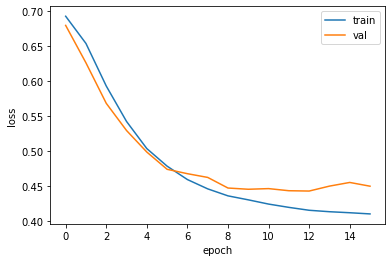

In [ ]:
# 훈련 및 검증 손실 그래프

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
"""
RNN one-hot encoding의 단점
입력 데이터의 크기가 너무크다보니 오래 걸린다.
"""

print(train_seq.nbytes, train_oh.nbytes)

8000000 4000000000


In [ ]:
"""
Word Embedding
숫자마다 고유한 실수 벡터를 부여하여 one-hot encoding의 단점을 커버한다.
"""
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 모델 훈련

rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 32s 97ms/step - loss: 0.6723 - accuracy: 0.5857 - val_loss: 0.6447 - val_accuracy: 0.6522
Epoch 2/100
313/313 [==============================] - 31s 99ms/step - loss: 0.6255 - accuracy: 0.6825 - val_loss: 0.6104 - val_accuracy: 0.7090
Epoch 3/100
313/313 [==============================] - 29s 91ms/step - loss: 0.5942 - accuracy: 0.7222 - val_loss: 0.5853 - val_accuracy: 0.7290
Epoch 4/100
313/313 [==============================] - 29s 92ms/step - loss: 0.5703 - accuracy: 0.7441 - val_loss: 0.5673 - val_accuracy: 0.7422
Epoch 5/100
313/313 [==============================] - 29s 92ms/step - loss: 0.5506 - accuracy: 0.7586 - val_loss: 0.5537 - val_accuracy: 0.7486
Epoch 6/100
313/313 [==============================] - 30s 96ms/step - loss: 0.5334 - accuracy: 0.7714 - val_loss: 0.5404 - val_accuracy: 0.7558
Epoch 7/100
313/313 [==============================] - 29s 92ms/step - loss: 0.5183 - accuracy: 0.7800 - val_loss: 0.5292 - val_ac

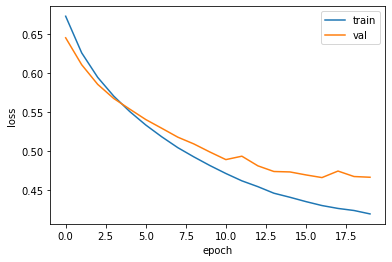

In [ ]:
# 훈련 및 검증 손실 그래프

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()